In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 48

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/fourmobro/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)

In [7]:
np.random.seed(265)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs)
data.normalize(imagenet_stats)

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
#learn.model = torch.nn.DataParallel(learn.model, device_ids=[0, 1])

In [10]:
learn.fit_one_cycle(10, max_lr=slice(1e-3))

Total time: 08:56
epoch  train_loss  valid_loss  error_rate
1      1.340935    0.389117    0.083730    (01:02)
2      0.494432    0.215090    0.060585    (00:52)
3      0.322017    0.188472    0.059905    (00:52)
4      0.222811    0.188224    0.058543    (00:52)
5      0.203621    0.159370    0.047651    (00:52)
6      0.149583    0.166236    0.053778    (00:52)
7      0.107508    0.147521    0.046290    (00:52)
8      0.098861    0.145528    0.042206    (00:52)
9      0.081278    0.144296    0.041525    (00:52)
10     0.071230    0.141046    0.042886    (00:52)



In [11]:
learn.save('stage-1-r50-bs48-rs265')

In [12]:
learn.load('stage-1-r50-bs48-rs265')

In [13]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


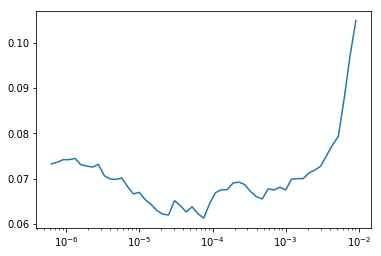

In [14]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(10e-5, 2e-5)) 

Total time: 11:30
epoch  train_loss  valid_loss  error_rate
1      0.076026    0.136237    0.041525    (01:11)
2      0.084618    0.159539    0.050374    (01:08)
3      0.095060    0.190418    0.057182    (01:08)
4      0.105098    0.181724    0.053097    (01:08)
5      0.072450    0.141252    0.047651    (01:08)
6      0.057049    0.148742    0.044248    (01:08)
7      0.041469    0.144127    0.042206    (01:08)
8      0.029071    0.128862    0.039483    (01:09)
9      0.020728    0.124353    0.037440    (01:08)
10     0.019649    0.123281    0.036079    (01:08)



In [16]:
learn.save('stage-2-r50-bs48-rs265')


In [17]:
learn.load('stage-2-r50-bs48-rs265')

In [18]:
learn.validate()

[0.12328086, 0.03607894450811564]